<a href="https://colab.research.google.com/github/HudaKhraiss/ADS2002-Group-Project/blob/Huda's-Branch/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [ ]:
cars = pd.read_csv("mtcars.csv")
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


huda was here again

In [ ]:
print(cars.shape)

(32, 12)


<ipython-input-17-740a28349359>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrs = cars.corr() # calculate the correlation table


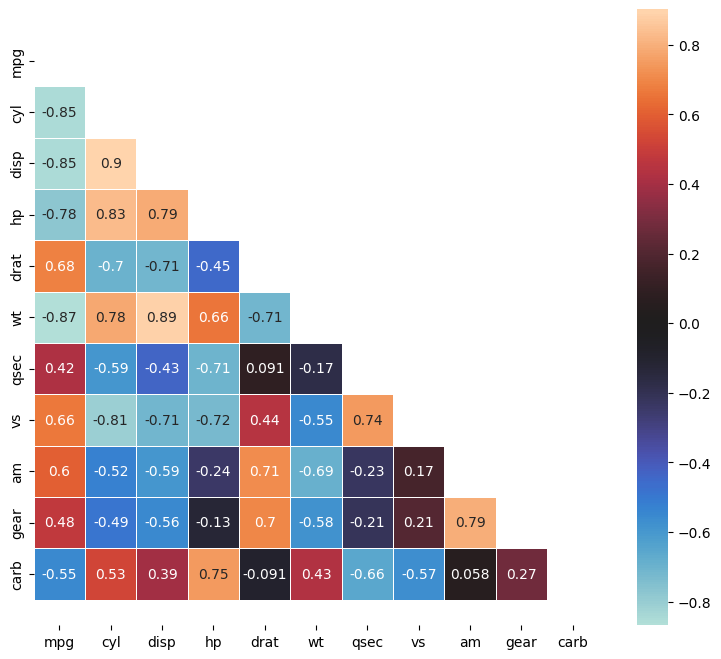

In [ ]:
corrs = cars.corr() # calculate the correlation table
# as this is a symmetric table, set up a mask so that we only plot values below the main diagonal
mask = np.triu(np.ones_like(corrs, dtype=bool))
f, ax = plt.subplots(figsize=(10, 8)) # initialise the plots and axes
# plot the correlations as a seaborn heatmap, with a colourbar
sns.heatmap(corrs, mask=mask, center=0, annot=True, square=True, linewidths=.5)
# do some fiddling so that the top and bottom are not obscured
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [ ]:
# setting the X and Y values

X = cars[["hp","wt"]]
Y = cars["mpg"]

In [ ]:
# splitting the train and test data

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2,
    random_state=np.random.RandomState(31287)
)

In [ ]:
# linear regression
linear = LinearRegression()
linear.fit(X_train,Y_train)

# predictions lol
training_predictions = linear.predict(X_train)
testing_predictions = linear.predict(X_test)

# evaluate them
pd.DataFrame({
    "R^2": {
        "train": r2_score(Y_train, training_predictions),
        "test": r2_score(Y_test, testing_predictions)
    },
    "RMSE": {
        "train": mean_squared_error(Y_train, training_predictions, squared=False),
        "test": mean_squared_error(Y_test, testing_predictions, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y_train, training_predictions),
        "test": mean_absolute_error(Y_test, testing_predictions),
    },
})

,R^2,RMSE,MAE
train,0.818331,2.676917,2.156919
test,0.537941,1.555350,1.162692


In [ ]:
# coefficients

feature_names = X.columns.tolist()
coefficients = pd.Series(data=linear.coef_.transpose(), index=feature_names)
coefficients

hp   -0.031081
wt   -4.047233
dtype: float64

In [ ]:
# printing

rsq_score = linear.score(X_train,Y_train)


print("rsq:",np.round(rsq_score,3))
print("coefficients:",np.round(linear.coef_,3))
print("intercept:",np.round(linear.intercept_,3))

rsq: 0.818
coefficients: [-0.031 -4.047]
intercept: 37.787
